In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import copy

from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
n = 50
e = np.array([random.normalvariate(0,0.5) for i in range(n)]).reshape(-1,1)
x = np.linspace(0,10,n).reshape(-1,1)
y = np.cos(x)+e

knots = np.array([2,4,6,7])

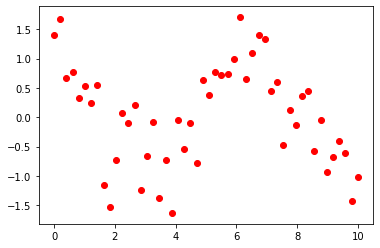

In [3]:
plt.scatter(x,y,color='red')

#### Spline with constants

In [4]:
X_ = (x < knots[0]).astype('float')
X = np.hstack((x,X_))

for i in range(len(knots)-1):
    X_ = ( (x.reshape(-1,1) >= knots[i])&(x < knots[i+1]) ).astype('float')
    X = np.hstack((X,X_))

X_ = (x > knots[len(knots)-1]).astype('float')
X = np.hstack((X,X_))
X = X[:,1:]

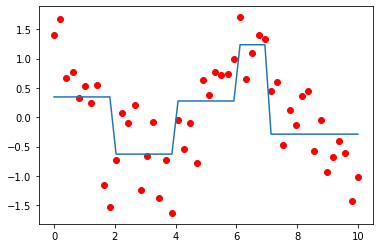

In [5]:
model = LinearRegression()

model.fit(X,y)
y_ = model.predict(X)

plt.scatter(x.reshape(-1,1),y,color='red')
plt.plot(x.reshape(-1,1),y_)

#### 3-degree polynomial

In [6]:
X = np.hstack((np.ones(shape=x.shape),x,np.power(x,2),np.power(x,3)))

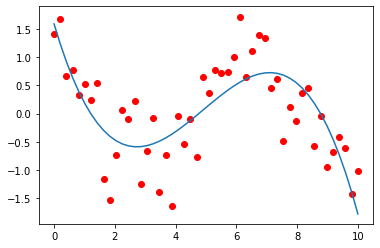

In [7]:
model = LinearRegression()

model.fit(X,y)
y_ = model.predict(X)

plt.scatter(x.reshape(-1,1),y,color='red')
plt.plot(x.reshape(-1,1),y_)

#### Continuos Spline of n-th degree

In [8]:
degree = 3

In [9]:
knots = np.array([2,4,6,7])
# knots = x.reshape(1,-1)[0]

In [10]:
# X - for learning
X = (np.ones(shape=x.shape))
for deg in range(1,degree+1):
    X = np.hstack((X,np.power(x,deg)))

for i in range(len(knots)):
    X_ = ( (x >= knots[i])*np.power(x-knots[i],degree) ).astype('float')
    X = np.hstack((X,X_))

In [11]:
# Learning
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# X_pred - for prediction
x_pred = np.linspace(0,10,1000).reshape(-1,1)

X_pred = (np.ones(shape=x_pred.shape))
for deg in range(1,degree+1):
    X_pred = np.hstack((X_pred,np.power(x_pred,deg)))

for i in range(len(knots)):
    X_pred_ = ( (x_pred >= knots[i])*np.power(x_pred-knots[i],degree) ).astype('float')
    X_pred = np.hstack((X_pred,X_pred_))

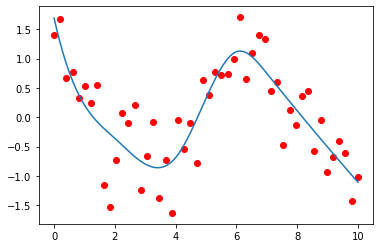

In [13]:
y_ = model.predict(X_pred)

plt.scatter(x.reshape(-1,1),y,color='red')
plt.plot(x_pred.reshape(-1,1),y_)

#### Regularized Natural Cubic Spline

In [14]:
# regularization parameter
alpha = 100

In [15]:
# knots = np.array([2,4,6,7])
# knots = x.reshape(1,-1)[0]
knots = x[10:x.shape[0]-10].reshape(1,-1)[0]

In [16]:
def d(k,x):
    return ( ((x >= knots[k-1])*np.power(x-knots[k-1],3)).astype('float') - ((x >= knots[len(knots)-1])*np.power(x-knots[len(knots)-1],3)).astype('float') )/\
    ( knots[k-1] - knots[len(knots)-1] )

X = np.hstack((np.ones(shape=x.shape),x))

for i in range(len(knots)-2):
    X_ = d(i+1,x) - d(len(knots)-1,x)
    X = np.hstack((X,X_))

In [17]:
# model = LinearRegression()
model = Ridge(alpha=alpha)
# model = Lasso(alpha=alpha)

model.fit(X,y)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [18]:
# X_pred - for prediction
x_pred = np.linspace(0,10,1000).reshape(-1,1)

X_pred = np.hstack((np.ones(shape=x_pred.shape),x_pred))

for i in range(len(knots)-2):
    X_pred_ = d(i+1,x_pred) - d(len(knots)-1,x_pred)
    X_pred = np.hstack((X_pred,X_pred_))

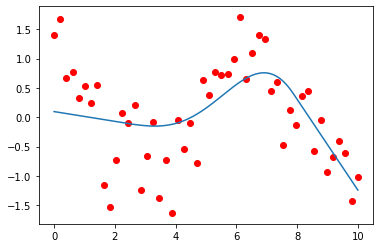

In [19]:
y_ = model.predict(X_pred)

plt.scatter(x.reshape(-1,1),y,color='red')
plt.plot(x_pred.reshape(-1,1),y_)

## Class with Regularized Natural Cubic Spline

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import copy

from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
from Splines import Splines

In [3]:
# initial parameters
alpha = 0.1
n = 500
e = np.array([random.normalvariate(0,0.5) for i in range(n)]).reshape(-1,1)
x = np.linspace(0,100,n).reshape(-1,1)
y = np.cos(x)+e
knots = np.array([10,12,13,14,15,16,17,18,19,20,21,40,60,80]).reshape(-1,1)

# x_pred - for prediction
x_pred = np.linspace(0,100,1000).reshape(-1,1)

In [5]:
s2 = Splines(knots = knots)
# s2 = Splines(knots = x)

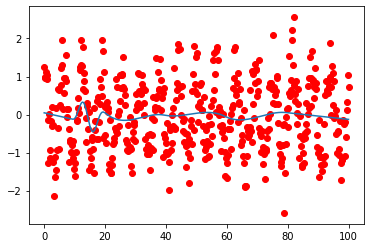

In [6]:
# results with knots=knots (s1)

model = Ridge(alpha=alpha)
# model = Lasso(alpha=alpha)

model.fit(s1.N(x),y)

y_ = model.predict(s1.N(x_pred))

plt.scatter(x.reshape(-1,1),y,color='red')
plt.plot(x_pred.reshape(-1,1),y_)

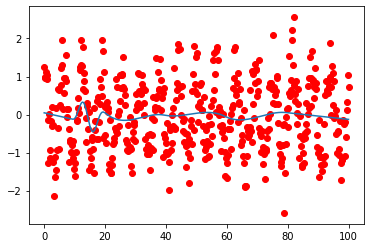

In [7]:
# results with knots=x (s2)

model = Ridge(alpha=alpha)
# model = Lasso(alpha=alpha)

model.fit(s2.N(x),y)

y_ = model.predict(s2.N(x_pred))

plt.scatter(x.reshape(-1,1),y,color='red')
plt.plot(x_pred.reshape(-1,1),y_)

In [8]:
s2.N(x)[:10,:3]

array([[1.        , 0.        , 0.        ],
       [1.        , 0.2004008 , 0.        ],
       [1.        , 0.4008016 , 0.        ],
       [1.        , 0.6012024 , 0.        ],
       [1.        , 0.80160321, 0.        ],
       [1.        , 1.00200401, 0.        ],
       [1.        , 1.20240481, 0.        ],
       [1.        , 1.40280561, 0.        ],
       [1.        , 1.60320641, 0.        ],
       [1.        , 1.80360721, 0.        ]])

In [9]:
s2.Omega()[0,:4,:4]

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        , 428.57142857, 417.23697479],
       [  0.        ,   0.        , 417.23697479, 406.58823529]])

In [10]:
s2.Omega()[0,-4:,-4:]

array([[330.68852459, 325.24590164, 319.62878577, 181.96721311],
       [325.24590164, 320.        , 314.5779661 , 180.        ],
       [319.62878577, 314.5779661 , 309.3559322 , 177.96610169],
       [181.96721311, 180.        , 177.96610169, 120.        ]])

In [11]:
s2.Omega().shape

(2, 14, 14)

In [12]:
s2.N(x).shape

(500, 26)

In [21]:
s2.N(x)[100,:]

array([ 1.00000000e+00,  2.00400802e+01, -1.44581758e+01, -1.92228882e+01,
       -7.64314719e+00, -1.08644547e+01, -5.20784452e+00, -7.75722402e+00,
       -3.33875208e+00, -5.28675125e+00, -1.96969496e+00, -3.39011750e+00,
       -1.03036233e+00, -2.00047145e+00, -4.45979151e-01, -1.04671729e+00,
       -1.36946207e-01, -4.53172363e-01, -1.84446578e-02, -1.39191227e-01,
       -1.07309235e-06, -1.87520687e-02,  0.00000000e+00, -1.09128036e-06,
        0.00000000e+00,  0.00000000e+00])

In [1]:
import numpy as np

In [2]:
a = np.arange(60.).reshape(3,4,5)
b = np.arange(24.).reshape(4,3,2)
c = np.tensordot(a,b, axes=([1,0],[0,1]))

In [3]:
a

array([[[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.]],

       [[20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.],
        [30., 31., 32., 33., 34.],
        [35., 36., 37., 38., 39.]],

       [[40., 41., 42., 43., 44.],
        [45., 46., 47., 48., 49.],
        [50., 51., 52., 53., 54.],
        [55., 56., 57., 58., 59.]]])

In [4]:
b

array([[[ 0.,  1.],
        [ 2.,  3.],
        [ 4.,  5.]],

       [[ 6.,  7.],
        [ 8.,  9.],
        [10., 11.]],

       [[12., 13.],
        [14., 15.],
        [16., 17.]],

       [[18., 19.],
        [20., 21.],
        [22., 23.]]])

In [5]:
import numpy as np

In [6]:
A = np.random.randint(10, size=(1,3,4,5))
B = np.random.randint(10, size=(1,3,4,5))

In [7]:
A

array([[[[1, 3, 9, 0, 6],
         [2, 2, 3, 9, 8],
         [7, 3, 8, 7, 1],
         [3, 8, 8, 0, 0]],

        [[4, 5, 7, 3, 3],
         [1, 3, 3, 4, 8],
         [6, 8, 5, 4, 9],
         [3, 2, 9, 8, 1]],

        [[1, 0, 9, 5, 4],
         [3, 3, 3, 1, 8],
         [1, 7, 5, 8, 8],
         [0, 8, 9, 4, 0]]]])

In [8]:
B

array([[[[3, 2, 5, 1, 6],
         [1, 5, 1, 0, 1],
         [6, 7, 5, 0, 8],
         [4, 2, 0, 3, 4]],

        [[4, 2, 1, 6, 1],
         [6, 4, 9, 8, 1],
         [4, 6, 3, 0, 5],
         [5, 3, 5, 0, 4]],

        [[0, 3, 6, 2, 8],
         [6, 3, 1, 8, 2],
         [3, 3, 2, 6, 1],
         [2, 4, 8, 8, 0]]]])

In [6]:
np.tensordot(A, B, axes=([0],[0])).shape

(3, 4, 5, 3, 4, 5)

In [7]:
t = np.tensordot(A, B, axes=([0],[0]))
t

array([[[[[[32, 12, 32, 16, 24],
           [32, 28, 28,  8, 12],
           [ 0,  4,  0,  0, 28],
           [ 0, 24, 32,  4, 24]],

          [[36, 36, 24, 28, 12],
           [32, 24, 12, 32,  0],
           [20,  0, 24, 28, 20],
           [28, 32, 12, 36, 36]],

          [[ 8, 24, 28,  4,  4],
           [28, 28,  8, 16,  8],
           [ 8, 20,  0, 16, 28],
           [16, 20, 32, 32, 36]]],


         [[[56, 21, 56, 28, 42],
           [56, 49, 49, 14, 21],
           [ 0,  7,  0,  0, 49],
           [ 0, 42, 56,  7, 42]],

          [[63, 63, 42, 49, 21],
           [56, 42, 21, 56,  0],
           [35,  0, 42, 49, 35],
           [49, 56, 21, 63, 63]],

          [[14, 42, 49,  7,  7],
           [49, 49, 14, 28, 14],
           [14, 35,  0, 28, 49],
           [28, 35, 56, 56, 63]]],


         [[[40, 15, 40, 20, 30],
           [40, 35, 35, 10, 15],
           [ 0,  5,  0,  0, 35],
           [ 0, 30, 40,  5, 30]],

          [[45, 45, 30, 35, 15],
           [40, 30, 15, 4

In [8]:
np.reshape(t, (np.prod(t.shape[:len(t.shape)//2]),np.prod(t.shape[:len(t.shape)//2])))

array([[32, 12, 32, ..., 32, 32, 36],
       [56, 21, 56, ..., 56, 56, 63],
       [40, 15, 40, ..., 40, 40, 45],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [48, 18, 48, ..., 48, 48, 54],
       [ 8,  3,  8, ...,  8,  8,  9]])

In [9]:
np.reshape(t, (np.prod(t.shape[:len(t.shape)//2]),np.prod(t.shape[:len(t.shape)//2]))).shape

(60, 60)

In [10]:
np.prod(t.shape[:len(t.shape)//2])

60

In [9]:
a = np.array((1, 2, 3, 4), dtype=object)
a.shape = (1, 2, 2)
A = np.array((5, 6, 7, 8), dtype=object)
A.shape = (1, 2, 2)
B = np.array((1,2,3,4,5,6,7,8),dtype=object)
B.shape = (2,2,2)

In [10]:
a

array([[[1, 2],
        [3, 4]]], dtype=object)

In [11]:
A

array([[[5, 6],
        [7, 8]]], dtype=object)

In [12]:
B

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]], dtype=object)

In [13]:
t = np.tensordot(a,A,([0],[0]))
# t = t.reshape(2,8)
t

array([[[[5, 6],
         [7, 8]],

        [[10, 12],
         [14, 16]]],


       [[[15, 18],
         [21, 24]],

        [[20, 24],
         [28, 32]]]], dtype=object)

In [14]:
t.shape

(2, 2, 2, 2)

In [15]:
np.swapaxes(B,0,1)

array([[[1, 2],
        [5, 6]],

       [[3, 4],
        [7, 8]]], dtype=object)

In [16]:
np.swapaxes(t,1,2)

array([[[[5, 6],
         [10, 12]],

        [[7, 8],
         [14, 16]]],


       [[[15, 18],
         [20, 24]],

        [[21, 24],
         [28, 32]]]], dtype=object)

In [9]:
# a = np.zeros([1,7,5,1])
# for i in range(1):
#     for ii in range(7):
#         for iii in range(5):
#             for iiii in range(1):
#                 for j in range(2):
#                     for k in range(3):
#                         for l in range(8):
#                             a[i,ii] += A[i,ii,k]*B[k,j,iii,l,iiii]

In [ ]:
def Omega(N_index, derivative_index):
    # derivative_index = [0,0] ~ d^2(f)/dx1^2
    place = 0
    res = 1
    for i in range(len(N_index)//2):
        if (derivative_index[0] == place)&(derivative_index[1] == place):
            res = res*integral_of_N2N2[N_index[i],N_index[i+len(N_index)//2]]
        else:
            if (derivative_index[0] == place) | (derivative_index[1] == place):
                res = res*integral_of_N1N1[N_index[i],N_index[i+len(N_index)//2]]
            else:
                res = res*integral_of_NN[N_index[i],N_index[i+len(N_index)//2]]
    return res

In [1]:
import numpy as np

In [2]:
a = np.array([['00','01'],['10','11']],dtype=object)
b = np.array([['aa','ab'],['ba','bb']],dtype=object)

In [3]:
a

array([['00', '01'],
       ['10', '11']], dtype=object)

In [4]:
b

array([['aa', 'ab'],
       ['ba', 'bb']], dtype=object)

In [5]:
np.tensordot(a,b,([0],[1]))

TypeError: can't multiply sequence by non-int of type 'str'

In [18]:
t = np.meshgrid(a,b)[0]+np.meshgrid(a,b)[1]
t

array([['00aa', '01aa', '10aa', '11aa'],
       ['00ab', '01ab', '10ab', '11ab'],
       ['00ba', '01ba', '10ba', '11ba'],
       ['00bb', '01bb', '10bb', '11bb']], dtype=object)

In [19]:
t.shape = (2,2,2,2)
t

array([[[['00aa', '01aa'],
         ['10aa', '11aa']],

        [['00ab', '01ab'],
         ['10ab', '11ab']]],


       [[['00ba', '01ba'],
         ['10ba', '11ba']],

        [['00bb', '01bb'],
         ['10bb', '11bb']]]], dtype=object)

In [35]:
t.flatten('K').reshape(4,4)

array([['00aa', '01aa', '10aa', '11aa'],
       ['00ab', '01ab', '10ab', '11ab'],
       ['00ba', '01ba', '10ba', '11ba'],
       ['00bb', '01bb', '10bb', '11bb']], dtype=object)

In [5]:
import itertools as it 

In [2]:
t = list(it.product(A[tuple(it.product([0, 1], repeat=2))], repeat=2))
t

NameError: name 'A' is not defined

In [41]:
arr = np.swapaxes(t,1,2).reshape(4,4,2,2)
arr

array([[[[0, 0],
         [0, 0]],

        [[0, 0],
         [0, 1]],

        [[0, 1],
         [0, 0]],

        [[0, 1],
         [0, 1]]],


       [[[0, 0],
         [1, 0]],

        [[0, 0],
         [1, 1]],

        [[0, 1],
         [1, 0]],

        [[0, 1],
         [1, 1]]],


       [[[1, 0],
         [0, 0]],

        [[1, 0],
         [0, 1]],

        [[1, 1],
         [0, 0]],

        [[1, 1],
         [0, 1]]],


       [[[1, 0],
         [1, 0]],

        [[1, 0],
         [1, 1]],

        [[1, 1],
         [1, 0]],

        [[1, 1],
         [1, 1]]]])

In [55]:
A[(it.product([0, 1], repeat=2))]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [6]:
t = list(it.product(A[tuple(it.product([0, 1], repeat=2)u)], repeat=2))
t

IndexError: too many indices for array

In [13]:
a = np.array([[1,2],
              [3,4]])
b = np.array([[10,20],
              [30,40]])


In [16]:
t = a.reshape(1,4).T.dot(b.reshape(1,4))
t

array([[ 10,  20,  30,  40],
       [ 20,  40,  60,  80],
       [ 30,  60,  90, 120],
       [ 40,  80, 120, 160]])

In [17]:
np.swapaxes(t,1,2)

AxisError: axis2: axis 2 is out of bounds for array of dimension 2

In [44]:
def totuple(a):
    try:
        return tuple(totuple(i) for i in a)
    except TypeError:
        return a

In [48]:
alpha = totuple(arr)
alpha

((((0, 0), (0, 0)), ((0, 0), (0, 1)), ((0, 1), (0, 0)), ((0, 1), (0, 1))),
 (((0, 0), (1, 0)), ((0, 0), (1, 1)), ((0, 1), (1, 0)), ((0, 1), (1, 1))),
 (((1, 0), (0, 0)), ((1, 0), (0, 1)), ((1, 1), (0, 0)), ((1, 1), (0, 1))),
 (((1, 0), (1, 0)), ((1, 0), (1, 1)), ((1, 1), (1, 0)), ((1, 1), (1, 1))))

In [4]:
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [47]:
A[alpha]

IndexError: too many indices for array

In [49]:
[A[a] for a in alpha]

IndexError: too many indices for array

In [61]:
a = np.array([[1,2],[3,4]],dtype=object)
b = np.array([[1,2],[3,4]],dtype=object)

In [62]:
np.meshgrid(a,b)[0]+np.meshgrid(a,b)[1]

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7],
       [5, 6, 7, 8]], dtype=object)

## Test

In [5]:
self.Omega2().shape

(2, 14, 14)

In [6]:
l = self.lower_limit[0,4,10]
l

10.0

In [7]:
u = self.upper_limit[0,4,10]
u

80.0

In [8]:
m = self.m[0,4,10]
m

80.0

In [9]:
m_ = self.m_[0,4,10]
m_

60.0

In [10]:
a = self.a[0,4,10]
a

15.0

In [11]:
b = self.b[0,4,10]
b

21.0

In [12]:
self.xi_j2

array([[10., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 40.],
       [ 9., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 39.]])

In [13]:
xi_j2 = self.xi_j2[0,4]
xi_j2

15.0

In [14]:
xi_m = self.xi_m[0,4]
xi_m

80.0

In [15]:
xi_m_ = self.xi_m_[0,4]
xi_m_

60.0

In [16]:
from scipy import integrate

In [17]:
def NN(x,a,b,m,m_):
    return ( ((x-a)**3*((x-a)>=0) - (x-m)**3*((x-m)>=0))/(m-a) - ((x-m_)**3*((x-m_)>=0) - (x-m)**3*((x-m)>=0))/(m-m_) ) * \
    ( ((x-b)**3*((x-b)>=0) - (x-m)**3*((x-m)>=0))/(m-b) - ((x-m_)**3*((x-m_)>=0) - (x-m)**3*((x-m)>=0))/(m-m_) )

In [18]:
integrate.quad(lambda x: NN(x,a,b,m,m_), l, u)[0]

117614214.4586369

In [19]:
self.Omega3()[0,6,12]

117614214.48116888

In [20]:
def N1N1(x,a,b,m,m_):
    return 9 * ( ((x-a)**2*((x-a)>=0) - (x-m)**2*((x-m)>=0))/(m-a) - ((x-m_)**2*((x-m_)>=0) - (x-m)**2*((x-m)>=0))/(m-m_) ) * \
    ( ((x-b)**2*((x-b)>=0) - (x-m)**2*((x-m)>=0))/(m-b) - ((x-m_)**2*((x-m_)>=0) - (x-m)**2*((x-m)>=0))/(m-m_) )

In [21]:
integrate.quad(lambda x: N1N1(x,a,b,m,m_), l, u)[0]

314700.7607444807

In [22]:
self.Omega2()[0,6,12]

314700.76067796606

In [23]:
def N2N2(x,a,b,m,m_):
    return 36 * ( ((x-a)*((x-a)>=0) - (x-m)*((x-m)>=0))/(m-a) - ((x-m_)*((x-m_)>=0) - (x-m)*((x-m)>=0))/(m-m_) ) * \
    ( ((x-b)*((x-b)>=0) - (x-m)*((x-m)>=0))/(m-b) - ((x-m_)*((x-m_)>=0) - (x-m)*((x-m)>=0))/(m-m_) )

In [24]:
integrate.quad(lambda x: N2N2(x,a,b,m,m_), l, u)[0]

338.27796612593585

In [25]:
self.Omega()[0,6,12]

338.2779661016919

In [26]:
self.integral_of_product2(lower_limit=l,upper_limit=u,a=a,b=b)

181801490.79999995

In [27]:
def product2(x,a,b):
    return (((x-a)**2)*((x-a)>=0) * ((x-b)**2)*((x-b)>=0))

In [28]:
integrate.quad(lambda x: product2(x,a,b), l, u)[0]

181801490.79991597

In [29]:
def XN(x, l, u, xi_j2, xi_m, xi_m_):
    return x*( ((x-xi_j2)**3*((x-xi_j2)>=0) - (x-xi_m)**3*((x-xi_m)>=0))/(xi_m-a) - ((x-xi_m_)**3*((x-xi_m_)>=0) - (x-m)**3*((x-m)>=0))/(xi_m-xi_m_) )

In [30]:
self.integral_of_XN(l, u, xi_j2, xi_m, xi_m_)

4447968.75

In [31]:
integrate.quad(lambda x: XN(x, l, u, xi_j2, xi_m, xi_m_), l, u)[0]

4447968.749737651

In [32]:
def N(x, l, u, xi_j2, xi_m, xi_m_):
    return ( ((x-xi_j2)**3*((x-xi_j2)>=0) - (x-xi_m)**3*((x-xi_m)>=0))/(xi_m-a) - ((x-xi_m_)**3*((x-xi_m_)>=0) - (x-m)**3*((x-m)>=0))/(xi_m-xi_m_) )

In [33]:
self.integral_of_N(l, u, xi_j2, xi_m, xi_m_)

66656.25

In [34]:
integrate.quad(lambda x: N(x, l, u, xi_j2, xi_m, xi_m_), l, u)[0]

66656.24999555765

In [35]:
def N1(x, l, u, xi_j2, xi_m, xi_m_):
    return 3*( ((x-xi_j2)**2*((x-xi_j2)>=0) - (x-xi_m)**2*((x-xi_m)>=0))/(xi_m-xi_j2) - ((x-xi_m_)**2*((x-xi_m_)>=0) - (x-m)**2*((x-m)>=0))/(xi_m-xi_m_) )

In [36]:
self.integral_of_N1(l, u, xi_j2, xi_m, xi_m_)

3825.0

In [37]:
integrate.quad(lambda x: N1(x, l, u, xi_j2, xi_m, xi_m_), l, u)[0]

3825.0000002371135